In [60]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from utils import load_train_data
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from tqdm import tqdm

In [61]:
def filter_class(data, labels, target_class, percentage_limit=0.45):
    # Inicialize listas para armazenar os patches que não excedem o limite de porcentagem
    filtered_data = []
    filtered_labels = []

    # Iterar sobre cada patch
    for i in tqdm(range(data.shape[0])):
        class_percentage = np.sum(labels[i] == target_class) / labels[i].size
        # print(class_percentage)
        
        # Se a porcentagem da classe alvo for menor ou igual ao limite, mantenha o patch
        if class_percentage <= percentage_limit:
            # print('here')
            filtered_data.append(data[i])
            filtered_labels.append(labels[i])
            # filtered_flag = True

    # Converta as listas para arrays NumPy
    filtered_data = np.array(filtered_data)
    filtered_labels = np.array(filtered_labels)

    print("Original number of patches:", data.shape[0])
    print("Filtered number of patches:", filtered_data.shape[0])
    return filtered_data, filtered_labels

In [63]:
# Load the data
data_path = os.path.join('data', 'meta.csv')
df = pd.read_csv(data_path)

print(df['Grid'].value_counts())

df = df[df.Grid == 1]
df = df[df.Season == 'Summer']
print(df.shape)
# Get random sample from train_data
df = df.sample(frac=1e-2)
print('Dataset size:', df.shape)

data, labels = load_train_data(df['Path'].values.tolist())
# data = data.reshape(data.shape[0], -1)
# labels = labels.reshape(labels.shape[0], -1)
print(data.shape, labels.shape)

Grid
1    880456
2    879374
Name: count, dtype: int64
(240826, 19)
Dataset size: (2408, 19)
(2408, 120, 120, 3) (2408, 120, 120)


In [64]:
filtered_data, filtered_labels = filter_class(data, labels, 12)
filtered_data, filtered_labels = filter_class(filtered_data, filtered_labels, 15)
filtered_data, filtered_labels = filter_class(filtered_data, filtered_labels, 17)
filtered_data, filtered_labels = filter_class(filtered_data, filtered_labels, 16)
filtered_data, filtered_labels = filter_class(filtered_data, filtered_labels, 33,\
    percentage_limit=0.9)
data, labels = filtered_data, filtered_labels
print(data.shape, labels.shape)

100%|██████████| 2408/2408 [00:00<00:00, 30587.36it/s]


Original number of patches: 2408
Filtered number of patches: 1526


100%|██████████| 1526/1526 [00:00<00:00, 34778.75it/s]


Original number of patches: 1526
Filtered number of patches: 1305


100%|██████████| 1305/1305 [00:00<00:00, 36320.22it/s]


Original number of patches: 1305
Filtered number of patches: 1012


100%|██████████| 1012/1012 [00:00<00:00, 31259.97it/s]


Original number of patches: 1012
Filtered number of patches: 854


100%|██████████| 854/854 [00:00<00:00, 31774.18it/s]

Original number of patches: 854
Filtered number of patches: 716
(716, 120, 120, 3) (716, 120, 120)


In [65]:
# Load classes.csv
# classes_path = os.path.join('classes.csv')
classes_df = pd.read_csv('data/classes.csv', sep='\t')
classes_df = classes_df.set_index('ID')
print(classes_df.head(20))
print(classes_df.columns)
print(classes_df.shape)


                                         Class
ID                                            
1                      Continuous urban fabric
2                   Discontinuous urban fabric
3               Industrial or commercial units
4   Road and rail networks and associated land
5                                   Port areas
6                                     Airports
7                     Mineral extraction sites
8                                   Dump sites
9                           Construction sites
10                           Green urban areas
11                Sport and leisure facilities
12                   Non-irrigated arable land
13                                   Vineyards
14           Fruit trees and berry plantations
15                                    Pastures
16                         Broad-leaved forest
17                           Coniferous forest
18                                Mixed forest
19                          Natural grasslands
20           

In [66]:
# Define a color name available in matplotlib to each of 33 classes
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan',
 'black', 'yellow', 'magenta', 'lime', 'teal', 'indigo', 'maroon', 'navy', 'peru', 'gold',
 'darkorange', 'darkgreen', 'darkred', 'darkblue', 'darkmagenta', 'darkcyan', 'darkgray',
 'darkolivegreen', 'cyan', 'darkslategray', 'darkgoldenrod', 'darkseagreen', 'darkslateblue']

print(classes_df.head(35))
print(len(colors))
# print(np.unique(classes_df['Color']).shape)
classes_df['Color'] = colors
print(classes_df.head(35))

                                         Class
ID                                            
1                      Continuous urban fabric
2                   Discontinuous urban fabric
3               Industrial or commercial units
4   Road and rail networks and associated land
5                                   Port areas
6                                     Airports
7                     Mineral extraction sites
8                                   Dump sites
9                           Construction sites
10                           Green urban areas
11                Sport and leisure facilities
12                   Non-irrigated arable land
13                                   Vineyards
14           Fruit trees and berry plantations
15                                    Pastures
16                         Broad-leaved forest
17                           Coniferous forest
18                                Mixed forest
19                          Natural grasslands
20           

In [67]:
classes_groups_df = pd.read_csv('data/class_groups.csv')
classes_df = pd.merge(classes_df.reset_index(), classes_groups_df, on='Class')
print(classes_df.head(20))
print(np.unique(classes_df['Group']).shape)

    ID                                       Class    Color  \
0    1                     Continuous urban fabric      red   
1    2                  Discontinuous urban fabric     blue   
2    3              Industrial or commercial units    green   
3    4  Road and rail networks and associated land   purple   
4    5                                  Port areas   orange   
5    6                                    Airports    brown   
6    7                    Mineral extraction sites     pink   
7    8                                  Dump sites     gray   
8    9                          Construction sites    olive   
9   10                           Green urban areas     cyan   
10  11                Sport and leisure facilities    black   
11  12                   Non-irrigated arable land   yellow   
12  13                                   Vineyards  magenta   
13  14           Fruit trees and berry plantations     lime   
14  15                                    Pastures     

In [68]:
# Group labels
group_labels = classes_df[['ID', 'Group_ID']].values
print(group_labels.shape)
labels_tmp = labels.copy()
for label in group_labels:
    print(label)
    labels_tmp[labels == label[0]] = label[1]
    print(np.unique(labels))
labels_groups = labels_tmp.copy()
# labels[labels == group_labels[0]] = group_labels[1]
# print(np.unique(labels))

(33, 2)
[1 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[2 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[3 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[4 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[5 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[6 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[7 5]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[8 5]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[9 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[10  1]
[ 1  2  3  4

In [73]:
# print(group_labels)
print(np.unique(labels))
print(np.unique(labels_groups))
# classes_df.set_index('ID', inplace=True)
groups_df = classes_groups_df[['Group_ID', 'Group', 'Group_Color']].drop_duplicates()
groups_df.set_index('Group_ID', inplace=True)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[1 2 3 4 5 6]


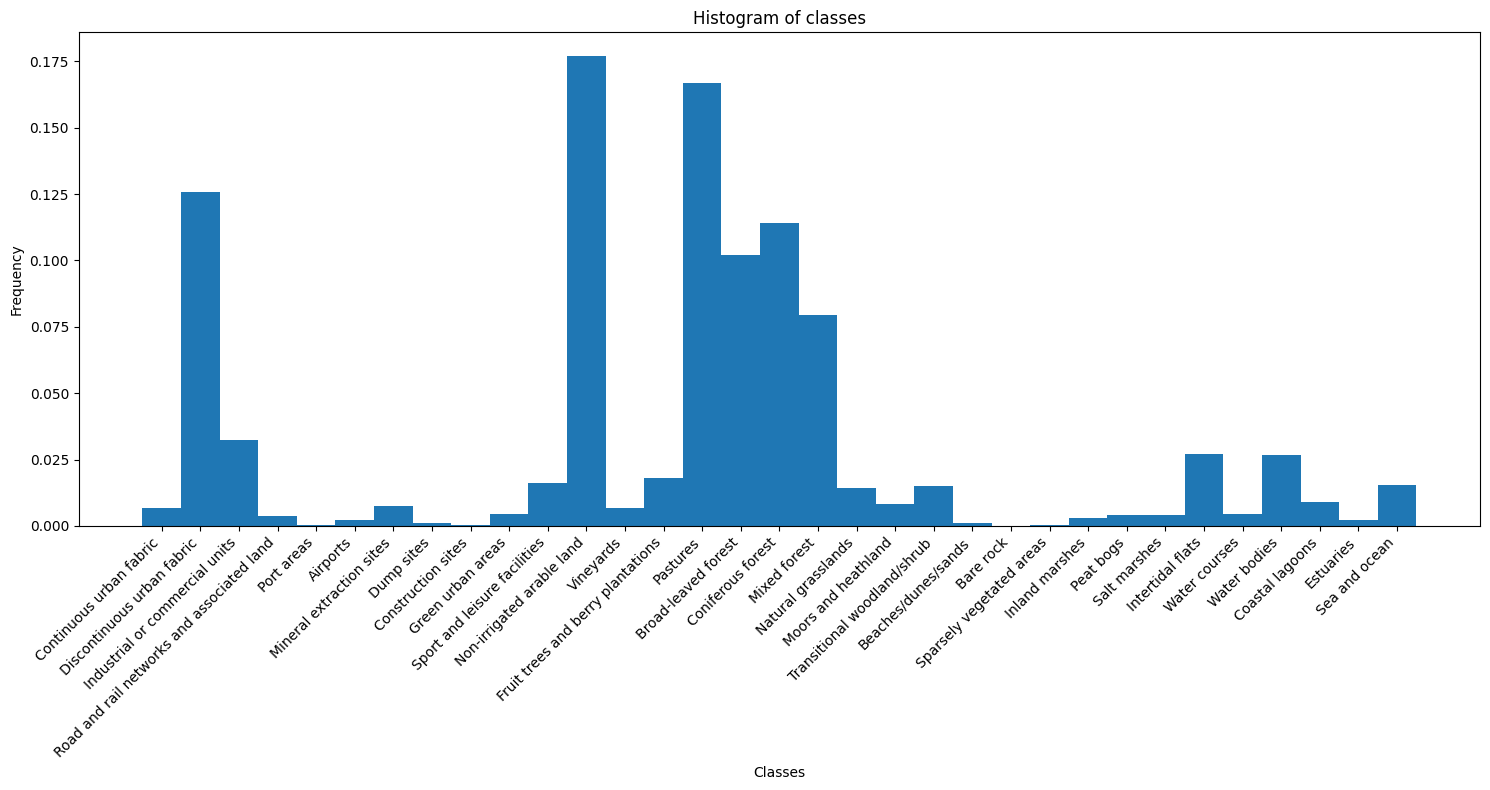

In [72]:
# Create an histogram of the classes
labels_tmp = filtered_labels.copy()

fig, ax = plt.subplots(figsize=(15, 8))
unique_classes, counts = np.unique(labels_tmp, return_counts=True)
weights = np.ones_like(labels_tmp.reshape(-1)) / len(labels_tmp.reshape(-1))
n, bins, patches = ax.hist(labels_tmp.reshape(-1), bins=np.unique(labels_tmp).shape[0], weights=weights)

# Substitua os rótulos do eixo x pelos nomes das classes
ax.set_xticks(bins[:-1] + (bins[1] - bins[0]) / 2)
ax.set_xticklabels([classes_df.loc[cls, "Class"] for cls in unique_classes], rotation=45, ha='right')

ax.set_title('Histogram of classes')
ax.set_xlabel('Classes')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

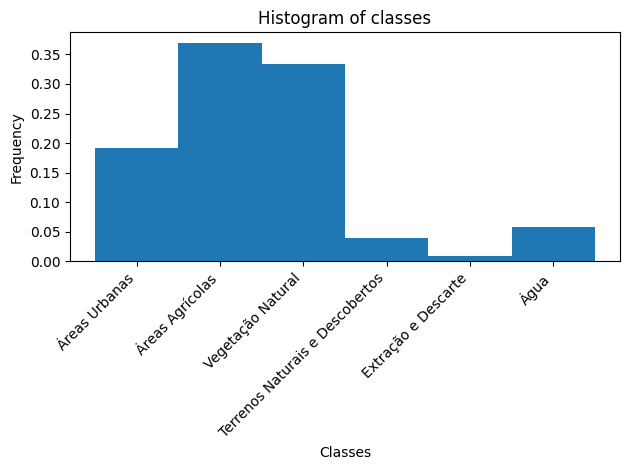

In [74]:
# Create an histogram of the Group classes
fig, ax = plt.subplots()
unique_classes, counts = np.unique(labels_groups, return_counts=True)
weights = np.ones_like(labels_groups.reshape(-1)) / len(labels_groups.reshape(-1))
n, bins, patches = ax.hist(labels_groups.reshape(-1), bins=np.unique(labels_groups).shape[0], weights=weights)

# Substitua os rótulos do eixo x pelos nomes das classes
ax.set_xticks(bins[:-1] + (bins[1] - bins[0]) / 2)
ax.set_xticklabels([groups_df.loc[cls, "Group"] for cls in unique_classes], rotation=45, ha='right')

ax.set_title('Histogram of classes')
ax.set_xlabel('Classes')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [75]:
def normalize_to_255(image):
    normalized = (image - np.min(image)) / (np.max(image) - np.min(image))
    return (normalized * 255).astype(np.uint8)

['gray' 'lightgreen' 'green' 'brown' 'orange' 'blue']
['Áreas Urbanas' 'Áreas Agrícolas' 'Vegetação Natural'
 'Terrenos Naturais e Descobertos' 'Extração e Descarte' 'Água']
[1 2 3 4 5 6]
                                    Group Group_Color
Group_ID                                             
1                           Áreas Urbanas        gray
2                         Áreas Agrícolas  lightgreen
3                       Vegetação Natural       green
4         Terrenos Naturais e Descobertos       brown
5                     Extração e Descarte      orange
6                                    Água        blue
[1 2 3]
[ 2  3 12 15 17 18]
Image: 1 - Present labels: ['Áreas Urbanas' 'Áreas Agrícolas' 'Vegetação Natural'] 

['Discontinuous urban fabric' 'Industrial or commercial units'
 'Non-irrigated arable land' 'Pastures' 'Coniferous forest' 'Mixed forest']
[2 3]
[15 16 17 18]
Image: 2 - Present labels: ['Áreas Agrícolas' 'Vegetação Natural'] 

['Pastures' 'Broad-leaved forest' 'Coni

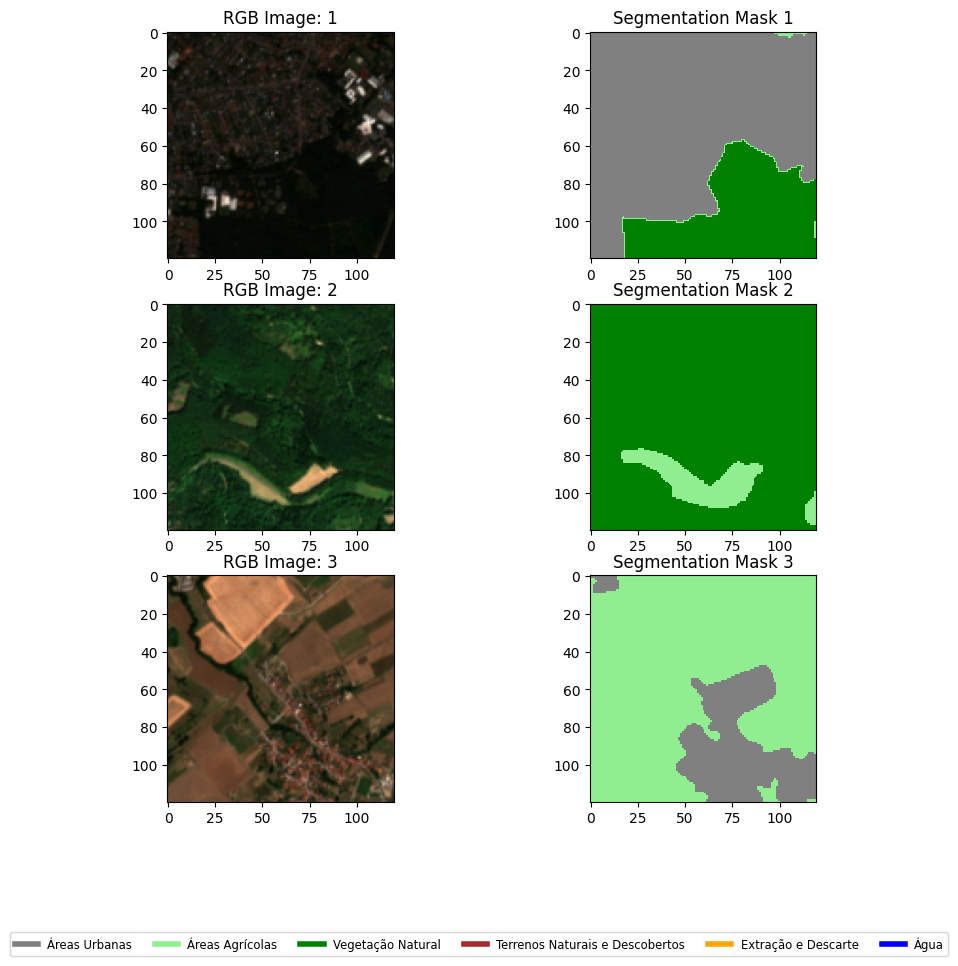

In [87]:
# Plot 3 rgb image and segmentation labels side by side
sample_size = 3
# Obtenha índices aleatórios
indices = np.random.choice(data.shape[0], sample_size, replace=False)
# Extraia a amostra dos arrays
sampled_data = data[indices]
sampled_labels = labels[indices]
sampled_labels_groups = labels_groups[indices]

fig, axs = plt.subplots(sample_size, 2, figsize=(10, 10))
# Convert class colors to a colormap
# colors = set(classes_df['Color_Group'].values)

# groups_df = classes_groups_df[['Group_ID', 'Group', 'Group_Color']].drop_duplicates()
# groups_df.set_index('Group_ID', inplace=True)
# classes_df.set_index('ID', inplace=True)

colors = groups_df['Group_Color'].drop_duplicates().values
print(colors)
print(groups_df['Group'].drop_duplicates().values)
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(len(colors) + 1)[1:]
print(bounds)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

print(groups_df.head(20))

for i in range(sample_size):
    # Index goes from 0 - 32 and labels go from 1 - 33
    original_labels = np.unique(sampled_labels[i])
    present_labels = np.unique(sampled_labels_groups[i])
    print(present_labels)
    print(original_labels)
    # present_labels = classes_df['Group', 'ID'].isin(present_indexes).values
    label_names = groups_df.loc[present_labels, 'Group'].values
    original_names = classes_df.loc[original_labels, 'Class'].values
    print(f'Image: {i+1} - Present labels: {label_names} \n')
    print(original_names)
    
    axs[i, 0].imshow(normalize_to_255(sampled_data[i]))
    axs[i, 0].set_title(f'RGB Image: {i+1}')
    
    axs[i, 1].imshow(sampled_labels_groups[i], cmap=cmap, norm=norm)
    axs[i, 1].set_title(f"Segmentation Mask {i+1}")

legend_elements = [plt.Line2D([0], [0], color=cmap(i), lw=4, label=f"{groups_df.loc[i+1, 'Group']}") for i in range(len(colors))]
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=8, fontsize='small')
plt.show()

In [12]:
print(classes_df.head(20))

                                         Class    Color                Group  \
ID                                                                             
1                      Continuous urban fabric      red        Áreas Urbanas   
2                   Discontinuous urban fabric     blue        Áreas Urbanas   
3               Industrial or commercial units    green        Áreas Urbanas   
4   Road and rail networks and associated land   purple        Áreas Urbanas   
5                                   Port areas   orange        Áreas Urbanas   
6                                     Airports    brown        Áreas Urbanas   
7                     Mineral extraction sites     pink  Extração e Descarte   
8                                   Dump sites     gray  Extração e Descarte   
9                           Construction sites    olive        Áreas Urbanas   
10                           Green urban areas     cyan        Áreas Urbanas   
11                Sport and leisure faci

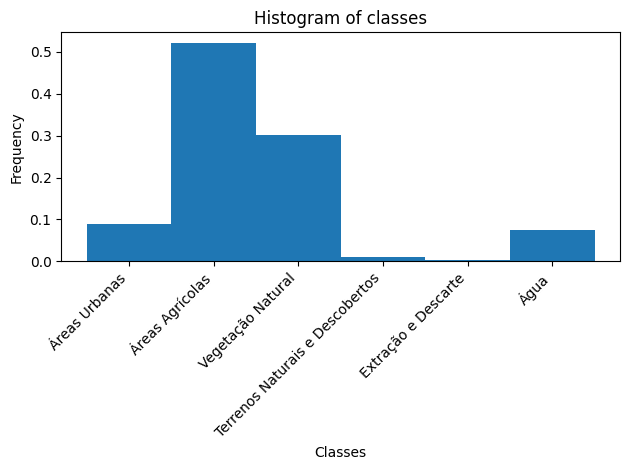

In [19]:
# Create an histogram of the Group classes
fig, ax = plt.subplots()
unique_classes, counts = np.unique(labels_groups, return_counts=True)
weights = np.ones_like(labels_groups.reshape(-1)) / len(labels_groups.reshape(-1))
n, bins, patches = ax.hist(labels_groups.reshape(-1), bins=np.unique(labels_groups).shape[0], weights=weights)

# Substitua os rótulos do eixo x pelos nomes das classes
ax.set_xticks(bins[:-1] + (bins[1] - bins[0]) / 2)
ax.set_xticklabels([groups_df.loc[cls, "Group"] for cls in unique_classes], rotation=45, ha='right')

ax.set_title('Histogram of classes')
ax.set_xlabel('Classes')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

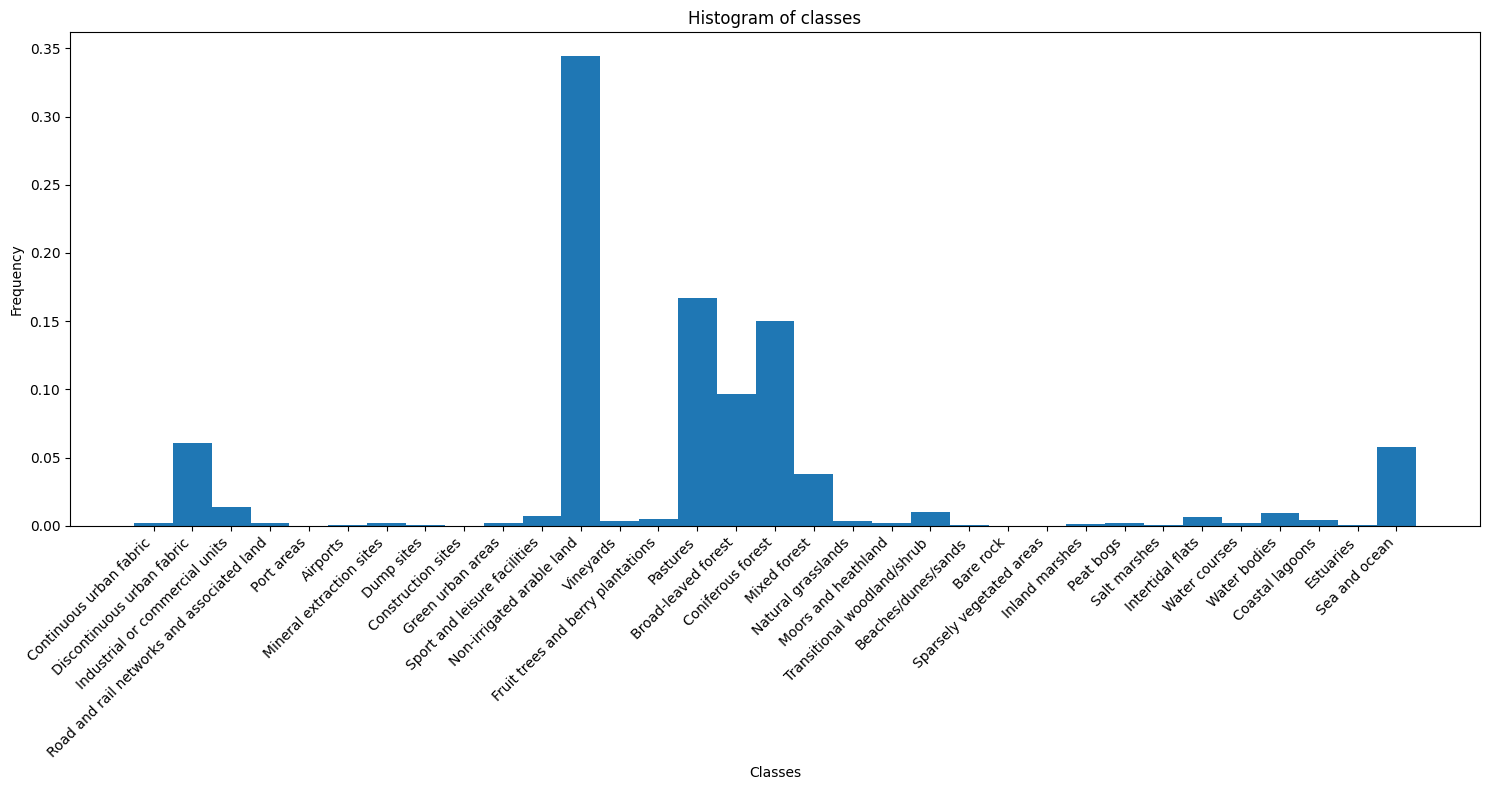

In [22]:
# Create an histogram of the Group classes
fig, ax = plt.subplots(figsize=(15, 8))
unique_classes, counts = np.unique(labels, return_counts=True)
weights = np.ones_like(labels.reshape(-1)) / len(labels.reshape(-1))
n, bins, patches = ax.hist(labels.reshape(-1), bins=np.unique(labels).shape[0], weights=weights)

# Substitua os rótulos do eixo x pelos nomes das classes
ax.set_xticks(bins[:-1] + (bins[1] - bins[0]) / 2)
ax.set_xticklabels([classes_df.loc[cls, "Class"] for cls in unique_classes], rotation=45, ha='right')

ax.set_title('Histogram of classes')
ax.set_xlabel('Classes')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [36]:
#! Investigar a grid2 do Dataset

# Load the data
data_path = os.path.join('data', 'meta.csv')
df = pd.read_csv(data_path)

print(df['Grid'].value_counts())

df = df[df.Grid == 1]
df = df[df.Season == 'Summer']
print(df.shape)
# Get random sample from train_data
df = df.sample(frac=5e-2)
print('Dataset size:', df.shape)

data, labels = load_train_data(df['Path'].values.tolist())
# data = data.reshape(data.shape[0], -1)
# labels = labels.reshape(labels.shape[0], -1)
print(data.shape, labels.shape)

Grid
1    880456
2    879374
Name: count, dtype: int64
(240826, 19)
Dataset size: (12041, 19)
(12041, 120, 120, 3) (12041, 120, 120)


In [58]:
filtered_data, filtered_labels = filter_class(data, labels, 12)
filtered_data, filtered_labels = filter_class(filtered_data, filtered_labels, 15)
filtered_data, filtered_labels = filter_class(filtered_data, filtered_labels, 17)
filtered_data, filtered_labels = filter_class(filtered_data, filtered_labels, 16)
filtered_data, filtered_labels = filter_class(filtered_data, filtered_labels, 33,\
    percentage_limit=0.9)
print(filtered_data.shape, filtered_labels.shape)


100%|██████████| 12041/12041 [00:00<00:00, 36220.73it/s]


Original number of patches: 12041
Filtered number of patches: 7588


100%|██████████| 7588/7588 [00:00<00:00, 32089.35it/s]


Original number of patches: 7588
Filtered number of patches: 6395


100%|██████████| 6395/6395 [00:00<00:00, 42712.40it/s]


Original number of patches: 6395
Filtered number of patches: 4799


100%|██████████| 4799/4799 [00:00<00:00, 44267.77it/s]


Original number of patches: 4799
Filtered number of patches: 4042


100%|██████████| 4042/4042 [00:00<00:00, 38907.36it/s]


Original number of patches: 4042
Filtered number of patches: 3437
(3437, 120, 120, 3) (3437, 120, 120)


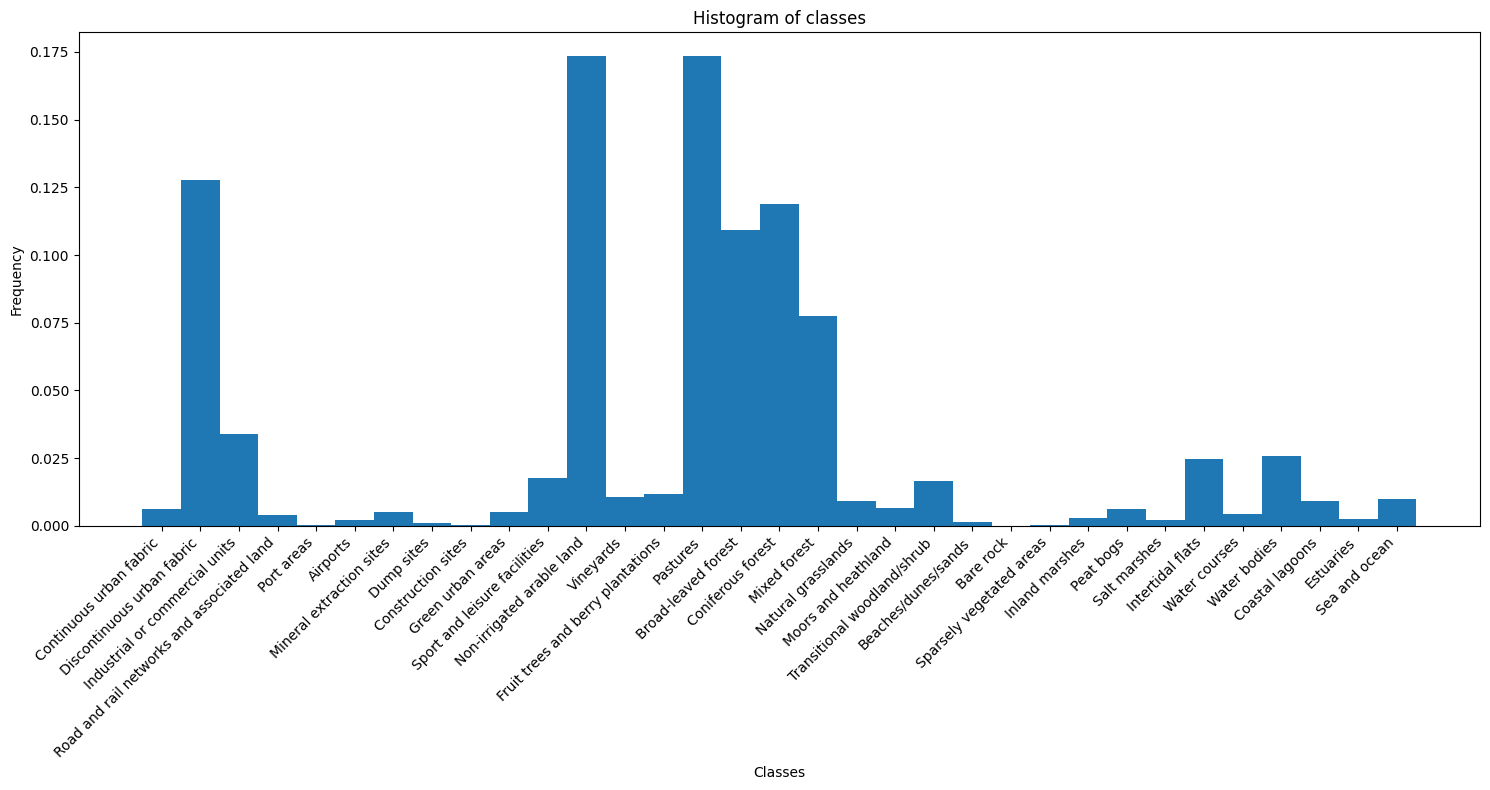

In [ ]:
# Create an histogram of the classes
labels_tmp = filtered_labels.copy()

fig, ax = plt.subplots(figsize=(15, 8))
unique_classes, counts = np.unique(labels_tmp, return_counts=True)
weights = np.ones_like(labels_tmp.reshape(-1)) / len(labels_tmp.reshape(-1))
n, bins, patches = ax.hist(labels_tmp.reshape(-1), bins=np.unique(labels_tmp).shape[0], weights=weights)

# Substitua os rótulos do eixo x pelos nomes das classes
ax.set_xticks(bins[:-1] + (bins[1] - bins[0]) / 2)
ax.set_xticklabels([classes_df.loc[cls, "Class"] for cls in unique_classes], rotation=45, ha='right')

ax.set_title('Histogram of classes')
ax.set_xlabel('Classes')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()